The dataset we have chosen to work with comes from IMDB's official website and contains information on what IMDB's critics deem to be the top 2000 movies. This dataset presents a valuable opportunity for us to apply the skills and knowledge we have gained throughout the course.

The dataset consists of 2000 rows, each containing 10 columns: movie name, year of release, movie running time (in minutes), IMDB rating, Metascore, number of votes, movie genres, movie director, lead actor/actress, and the gross values of the movie. The total CSV file size is a manageable 203 kb.

In [1]:
from IMDBAnalysis import read_csv_to_list
# Read the CSV file into a list of rows
rows = read_csv_to_list("imdb_top_2000_movies.csv")

# Access the data
print(f"Header: {rows[0]}")

Header: ['Movie Name', 'Release Year', 'Duration', 'IMDB Rating', 'Metascore', 'Votes', 'Genre', 'Director', 'Cast', 'Gross']


In [2]:
from IMDBAnalysis import read_csv_to_df
# Read the CSV file into a DataFrame
df = read_csv_to_df("imdb_top_2000_movies.csv")

# Access the data
print(df.head())
print(df.shape)

              Movie Name Release Year  Duration  IMDB Rating  Metascore  \
0          The Godfather         1972       175          9.2      100.0   
1  The Godfather Part II         1974       202          9.0       90.0   
2        Ordinary People         1980       124          7.7       86.0   
3     Lawrence of Arabia         1962       218          8.3      100.0   
4             Straw Dogs         1971       113          7.4       73.0   

       Votes                        Genre              Director  \
0  2,002,655                 Crime, Drama  Francis Ford Coppola   
1  1,358,608                 Crime, Drama  Francis Ford Coppola   
2     56,476                        Drama        Robert Redford   
3    313,044  Adventure, Biography, Drama            David Lean   
4     64,331       Crime, Drama, Thriller         Sam Peckinpah   

                Cast     Gross  
0      Marlon Brando  $134.97M  
1          Al Pacino   $57.30M  
2  Donald Sutherland   $54.80M  
3      Peter O

In [3]:
from IMDBAnalysis import get_top_highest_grossing_movies

# Get the highest earning movies (can get as many as you want)
highest_earning_movies= get_top_highest_grossing_movies(df, n=20)
print(highest_earning_movies)

                                         Movie Name   Gross
1763                                         Avatar  760.51
511                                         Titanic  659.33
1508                                The Dark Knight  534.86
764       Star Wars: Episode I - The Phantom Menace  474.54
1076                                        Shrek 2  436.47
350                      E.T. the Extra-Terrestrial  435.11
1263     Pirates of the Caribbean: Dead Man's Chest  423.32
516                                   The Lion King  422.78
1797                                    Toy Story 3  415.00
1012                                     Spider-Man  403.71
554                                   Jurassic Park  402.45
1822            Transformers: Revenge of the Fallen  402.11
1066                                   Finding Nemo  380.84
1261   Star Wars: Episode III - Revenge of the Sith  380.26
1019  The Lord of the Rings: The Return of the King  377.85
1256                                   S

In [4]:
from IMDBAnalysis import get_top_actors

# Get the top actors (can get as many as you want)
top_actors = get_top_actors(df, n=20)
print(top_actors)

Tom Cruise               23
Tom Hanks                21
Robert De Niro           21
Nicolas Cage             19
Adam Sandler             18
Denzel Washington        15
Johnny Depp              15
Arnold Schwarzenegger    15
Mel Gibson               15
Bruce Willis             14
Leonardo DiCaprio        14
Harrison Ford            14
Jim Carrey               14
Will Smith               13
Al Pacino                13
Kevin Costner            13
Sylvester Stallone       13
Brad Pitt                13
Clint Eastwood           12
Christian Bale           12
dtype: int64


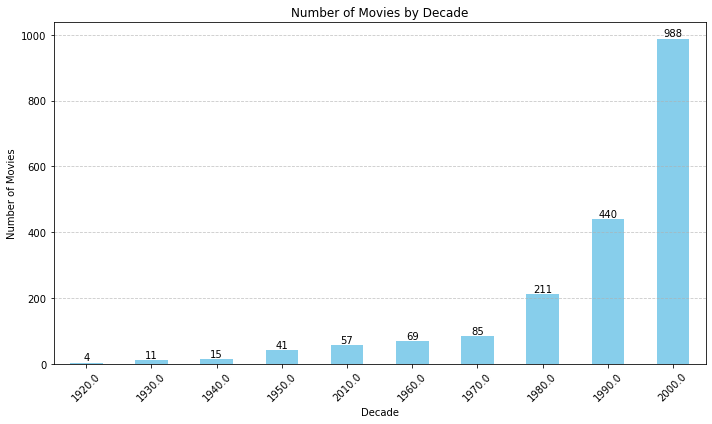

In [5]:
from IMDBAnalysis import plot_movies_by_decade 
# Plot the movies by decade
plot_movies_by_decade(df)

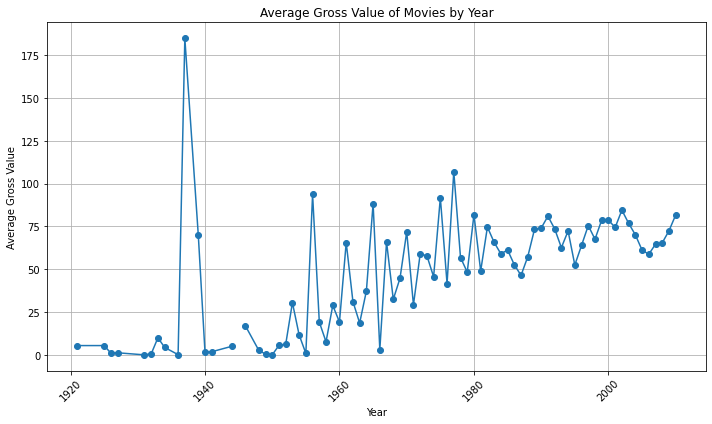

In [6]:
from IMDBAnalysis import plot_average_gross_by_year
# Plot the average gross value of movies by year
plot_average_gross_by_year(df)

In [7]:
from IMDBAnalysis import get_top_1939_movies_by_gross
# Get the top 5 movies made in 1939 by gross value
top_1939_movies = get_top_1939_movies_by_gross(df, n=5)
print(top_1939_movies)

                       Movie Name   Gross
129            Gone with the Wind  198.68
77   Mr. Smith Goes to Washington    9.60
74               The Wizard of Oz    2.08
144                    Stagecoach     NaN


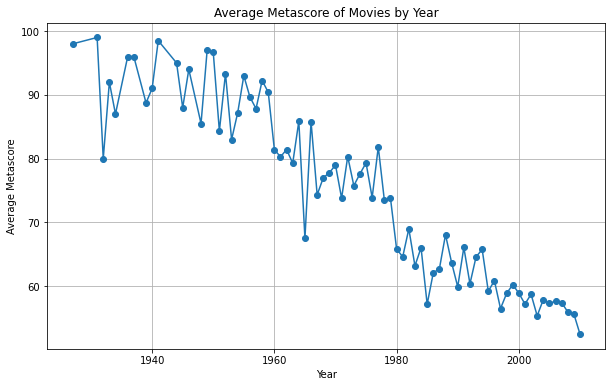

In [8]:
from IMDBAnalysis import plot_average_metascore_by_year
# Plot the average metascore of movies by year
plot_average_metascore_by_year(df)

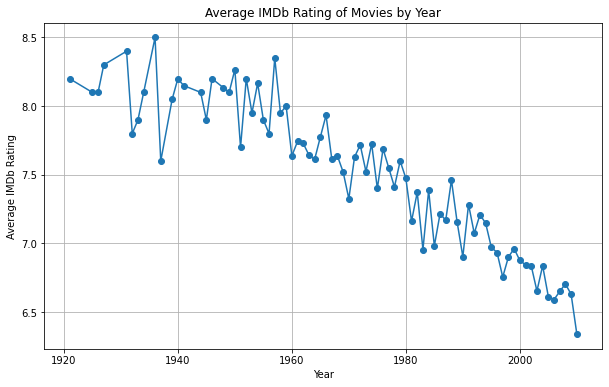

In [9]:
from IMDBAnalysis import plot_average_imdb_rating_by_year
# Plot the average IMDB rating of movies by year
plot_average_imdb_rating_by_year(df)

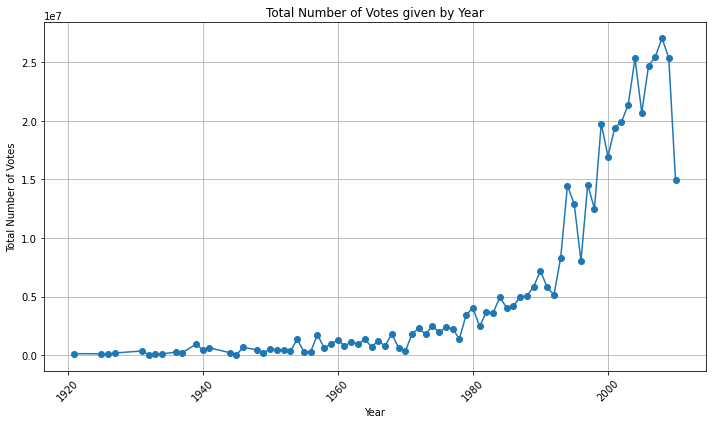

In [10]:
from IMDBAnalysis import plot_total_votes_by_year
# Plot the total critic votes by year
plot_total_votes_by_year(df)

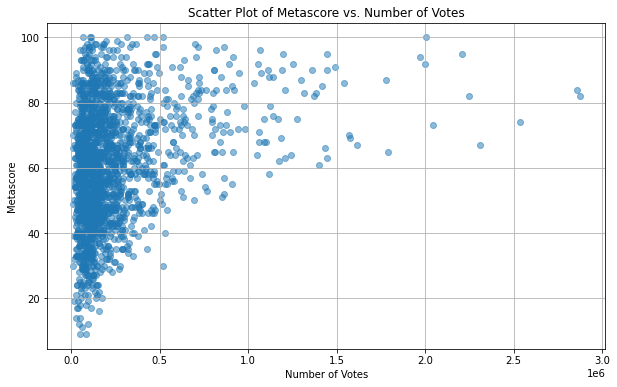

In [11]:
from IMDBAnalysis import plot_metascore_vs_votes
# Plot the metascore versus year
plot_metascore_vs_votes(df)

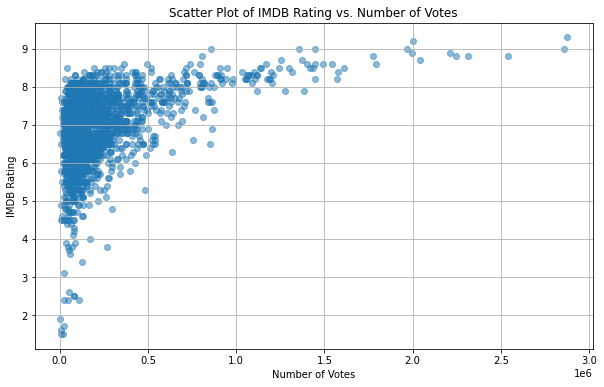

In [12]:
from IMDBAnalysis import plot_imdb_rating_vs_votes
# Plot the IMDB rating versus year
plot_imdb_rating_vs_votes(df)

In [13]:
from IMDBAnalysis import one_hot_encode_genre_column
df_encoded = one_hot_encode_genre_column(df, column_name='Genre', separator=', ')
df_encoded.head()
df_encoded.columns


Index(['Movie Name', 'Release Year', 'Duration', 'IMDB Rating', 'Metascore',
       'Votes', 'Director', 'Cast', 'Gross', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [14]:
from IMDBAnalysis import train_test_split
df_encoded.dropna(inplace=True)
X = df_encoded.drop(['Movie Name', 'Release Year', 'Metascore', 'Director', 'Cast', 'Duration', 'Votes', 'Gross', 'IMDB Rating'], axis = 1)
y = df_encoded['IMDB Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 210)
X_train


,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
508,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1174,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1382,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1017,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1464,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1257,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1098,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
124,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
from IMDBAnalysis import linear_pred
from IMDBAnalysis import get_mse
from IMDBAnalysis import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(linear_pred(X_train, X_test, y_train))
print('MSE: ', get_mse(y_pred, y_test))

        Feature  Coefficient
0        Action    -0.491183
1     Adventure    -0.055402
2     Animation     0.410880
3     Biography     0.037755
4        Comedy    -0.420855
5         Crime    -0.045991
6   Documentary     0.580700
7         Drama     0.272954
8        Family    -0.305787
9       Fantasy    -0.194794
10    Film-Noir     0.645297
11      History    -0.080397
12       Horror    -0.543953
13        Music    -0.478253
14      Musical    -0.043481
15      Mystery    -0.064118
16      Romance    -0.342718
17       Sci-Fi    -0.098191
18        Sport    -0.180243
19     Thriller    -0.086263
20          War     0.311485
21      Western     0.320449
MSE:  0.5932802220678282


Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object') [-0.48154532 -0.02627027  0.39672954  0.02773862 -0.39820722 -0.01047958
  0.28565429 -0.27858867 -0.17214541  0.3971283  -0.510095   -0.42670774
 -0.04091512 -0.31532333 -0.07219162 -0.10896789 -0.06666033  0.29262498
  0.24146666]


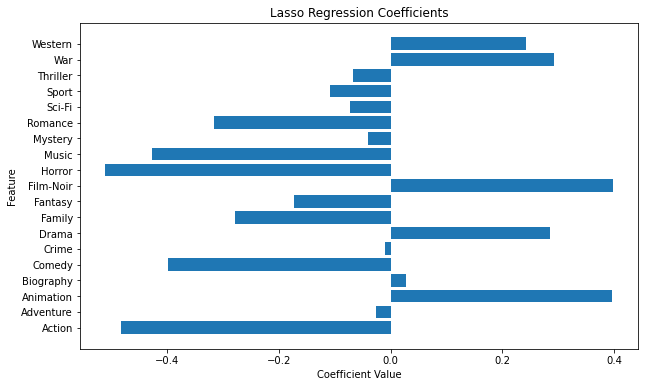

None


In [16]:
from IMDBAnalysis import lasso_reg
from IMDBAnalysis import lasso_plot

selected, coef = lasso_reg(X_train, X_test, y_train)
print(selected, coef)

print(lasso_plot(selected, coef))

In [17]:
X1 = df_encoded.dropna()
X1

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Director,Cast,Gross,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Godfather,1972.0,175,9.2,100.0,2002655,Francis Ford Coppola,Marlon Brando,134.97,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather Part II,1974.0,202,9.0,90.0,1358608,Francis Ford Coppola,Al Pacino,57.30,0,...,0,0,0,0,0,0,0,0,0,0
2,Ordinary People,1980.0,124,7.7,86.0,56476,Robert Redford,Donald Sutherland,54.80,0,...,0,0,0,0,0,0,0,0,0,0
3,Lawrence of Arabia,1962.0,218,8.3,100.0,313044,David Lean,Peter O'Toole,44.82,0,...,0,0,0,0,0,0,0,0,0,0
5,Close Encounters of the Third Kind,1977.0,138,7.6,90.0,216050,Steven Spielberg,Richard Dreyfuss,132.09,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Ninja Assassin,2009.0,99,6.3,34.0,75419,James McTeigue,Rain,38.11,1,...,0,0,0,0,0,0,0,1,0,0
1995,The Young Victoria,2009.0,105,7.2,64.0,66235,Jean-Marc Vallée,Emily Blunt,11.00,0,...,0,0,0,0,0,0,0,0,0,0
1997,The Informant!,2009.0,108,6.5,66.0,67318,Steven Soderbergh,Matt Damon,33.31,0,...,0,0,0,0,0,0,0,0,0,0
1998,Youth in Revolt,2009.0,90,6.4,63.0,75956,Miguel Arteta,Michael Cera,15.28,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
from IMDBAnalysis import remove_commas
df_enc = df_encoded.dropna()
X1 = df_enc

X1['Votes'] = X1['Votes'].apply(remove_commas).astype(float)
df_enc = df_encoded.dropna()

y1 = df_enc['IMDB Rating']  

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=210)

In [19]:
X1_train

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Director,Cast,Gross,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
508,Speed,1994.0,116,7.3,78.0,390316.0,Jan de Bont,Keanu Reeves,121.25,1,...,0,0,0,0,0,0,0,1,0,0
1174,The Prince & Me,2004.0,111,5.8,47.0,41461.0,Martha Coolidge,Julia Stiles,28.18,0,...,0,0,0,0,1,0,0,0,0,0
1382,Kinsey,2004.0,118,7.1,79.0,50887.0,Bill Condon,Liam Neeson,10.21,0,...,0,0,0,0,1,0,0,0,0,0
1017,Pirates of the Caribbean: The Curse of the Bla...,2003.0,143,8.1,63.0,1205230.0,Gore Verbinski,Johnny Depp,305.41,1,...,0,0,0,0,0,0,0,0,0,0
1464,Sahara,2005.0,124,6.1,41.0,103360.0,Breck Eisner,Matthew McConaughey,68.67,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hope Floats,1998.0,114,6.0,43.0,30061.0,Forest Whitaker,Sandra Bullock,60.05,0,...,0,0,0,0,1,0,0,0,0,0
1257,The Devil Wears Prada,2006.0,109,6.9,62.0,463910.0,David Frankel,Anne Hathaway,124.74,0,...,0,0,0,0,0,0,0,0,0,0
1098,Frida,2002.0,123,7.3,61.0,95068.0,Julie Taymor,Salma Hayek,25.89,0,...,0,0,0,0,1,0,0,0,0,0
124,Superman II,1980.0,127,6.8,83.0,114301.0,Richard Lester,Gene Hackman,108.19,1,...,0,0,0,0,0,1,0,0,0,0


In [20]:
from IMDBAnalysis import ridge_reg

num_features = ['Duration', 'Votes', 'Gross']
cat_features = selected

y_pred = ridge_reg(num_features, cat_features, X1_train, y1_train, X1_test)

In [21]:
from IMDBAnalysis import get_res_df

res = get_res_df(y_pred, X1_test)
res


,Predicted,Actual
0,6.669715,7.9
1,7.091058,7.0
2,6.918829,7.2
3,6.855833,6.6
4,6.769825,7.4
...,...,...
357,7.078354,7.1
358,6.955719,7.2
359,6.264235,6.6
360,7.349734,8.0


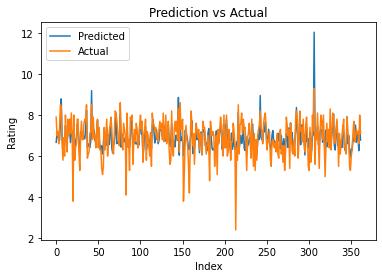

In [22]:
from IMDBAnalysis import plot_pred_act

plot_pred_act(res)